In [184]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from datetime import datetime

In [3]:
dfEstaciones =pd.read_csv('../Escritorio/Datos/TP1/station.csv', thousands=',', low_memory=False)
dfClima=pd.read_csv('../Escritorio/Datos/TP1/weather.csv', thousands=',', low_memory=False)
dfViajes = pd.read_csv('../Escritorio/Datos/TP1/trip.csv', thousands=',', low_memory=False)

In [ ]:
chunksize = 10 ** 2
for chunk in pd.read_csv('../Escritorio/Datos/TP1/status.csv', chunksize=chunksize):
    print(chunk)

    station_id  bikes_available  docks_available                 time
0            2                2               25  2013/08/29 12:06:01
1            2                2               25  2013/08/29 12:07:01
2            2                2               25  2013/08/29 12:08:01
3            2                2               25  2013/08/29 12:09:01
4            2                2               25  2013/08/29 12:10:01
5            2                2               25  2013/08/29 12:11:01
6            2                2               25  2013/08/29 12:12:01
7            2                2               25  2013/08/29 12:13:01
8            2                2               25  2013/08/29 12:15:01
9            2                2               25  2013/08/29 12:16:02
10           2                2               25  2013/08/29 12:18:01
11           2                2               25  2013/08/29 12:19:01
12           2                2               25  2013/08/29 12:20:01
13           2      

In [26]:
dfEstaciones.tail(20)

id                                           name        lat        long  \
50  62                                  2nd at Folsom  37.785299 -122.396236   
51  63                                  Howard at 2nd  37.786978 -122.398108   
52  64                              2nd at South Park  37.782259 -122.392738   
53  65                                Townsend at 7th  37.771058 -122.402717   
54  66                       South Van Ness at Market  37.774814 -122.418954   
55  67                                 Market at 10th  37.776619 -122.417385   
56  68  Yerba Buena Center of the Arts (3rd @ Howard)  37.784878 -122.401014   
57  69        San Francisco Caltrain 2 (330 Townsend)  37.776600 -122.395470   
58  70       San Francisco Caltrain (Townsend at 4th)  37.776617 -122.395260   
59  71                  Powell at Post (Union Square)  37.788446 -122.408499   
60  72              Civic Center BART (7th at Market)  37.781039 -122.411748   
61  73                Grant Avenue at Columbus Avenue  37.798522 -122.407245   
62  74                              Steuart at Market  37.794139 -122.394434   
63  75            Mechanics Plaza (Market at Battery)  37.791300 -122.399051   
64  76                                  Market at 4th  37.786305 -122.404966   
65  77                              Market at Sansome  37.789625 -122.400811   
66  80                Santa Clara County Civic Center  37.352601 -121.905733   
67  82                      Broadway St at Battery St  37.798541 -122.400862   
68  83                                     Mezes Park  37.491269 -122.236234   
69  84                                    Ryland Park  37.342725 -121.895617   

    dock_count           city installation_date  
50          19  San Francisco         8/22/2013  
51          19  San Francisco         8/22/2013  
52          15  San Francisco         8/22/2013  
53          15  San Francisco         8/22/2013  
54          19  San Francisco         8/23/2013  
55          27  San Francisco         8/23/2013  
56          19  San Francisco         8/23/2013  
57          23  San Francisco         8/23/2013  
58          19  San Francisco         8/23/2013  
59          19  San Francisco         8/23/2013  
60          23  San Francisco         8/23/2013  
61          15  San Francisco         8/21/2013  
62          23  San Francisco         8/25/2013  
63          19  San Francisco         8/25/2013  
64          19  San Francisco         8/25/2013  
65          27  San Francisco         8/25/2013  
66          15       San Jose        12/31/2013  
67          15  San Francisco         1/22/2014  
68          15   Redwood City         2/20/2014  
69          15       San Jose          4/9/2014

In [21]:
dfEstaciones

id                                           name        lat        long  \
0    2              San Jose Diridon Caltrain Station  37.329732 -121.901782   
1    3                          San Jose Civic Center  37.330698 -121.888979   
2    4                         Santa Clara at Almaden  37.333988 -121.894902   
3    5                               Adobe on Almaden  37.331415 -121.893200   
4    6                               San Pedro Square  37.336721 -121.894074   
5    7                           Paseo de San Antonio  37.333798 -121.886943   
6    8                            San Salvador at 1st  37.330165 -121.885831   
7    9                                      Japantown  37.348742 -121.894715   
8   10                             San Jose City Hall  37.337391 -121.886995   
9   11                                    MLK Library  37.335885 -121.885660   
10  12                         SJSU 4th at San Carlos  37.332808 -121.883891   
11  13                                  St James Park  37.339301 -121.889937   
12  14                       Arena Green / SAP Center  37.332692 -121.900084   
13  16                     SJSU - San Salvador at 9th  37.333955 -121.877349   
14  21                              Franklin at Maple  37.481758 -122.226904   
15  22                  Redwood City Caltrain Station  37.486078 -122.232089   
16  23                        San Mateo County Center  37.487616 -122.229951   
17  24                    Redwood City Public Library  37.484219 -122.227424   
18  25                       Stanford in Redwood City  37.485370 -122.203288   
19  26                    Redwood City Medical Center  37.487682 -122.223492   
20  27                        Mountain View City Hall  37.389218 -122.081896   
21  28                 Mountain View Caltrain Station  37.394358 -122.076713   
22  29                   San Antonio Caltrain Station  37.406940 -122.106758   
23  30                           Evelyn Park and Ride  37.390277 -122.066553   
24  31                    San Antonio Shopping Center  37.400443 -122.108338   
25  32               Castro Street and El Camino Real  37.385956 -122.083678   
26  33          Rengstorff Avenue / California Street  37.400241 -122.099076   
27  34                     Palo Alto Caltrain Station  37.443988 -122.164759   
28  35                         University and Emerson  37.444521 -122.163093   
29  36                California Ave Caltrain Station  37.429082 -122.142805   
..  ..                                            ...        ...         ...   
40  51                          Embarcadero at Folsom  37.791464 -122.391034   
41  39                             Powell Street BART  37.783871 -122.408433   
42  54                          Embarcadero at Bryant  37.787152 -122.388013   
43  55  Temporary Transbay Terminal (Howard at Beale)  37.789756 -122.394643   
44  56                                Beale at Market  37.792251 -122.397086   
45  57                                  5th at Howard  37.781752 -122.405127   
46  58                        San Francisco City Hall  37.778650 -122.418235   
47  59                            Golden Gate at Polk  37.781332 -122.418603   
48  60                         Embarcadero at Sansome  37.804770 -122.403234   
49  61                                2nd at Townsend  37.780526 -122.390288   
50  62                                  2nd at Folsom  37.785299 -122.396236   
51  63                                  Howard at 2nd  37.786978 -122.398108   
52  64                              2nd at South Park  37.782259 -122.392738   
53  65                                Townsend at 7th  37.771058 -122.402717   
54  66                       South Van Ness at Market  37.774814 -122.418954   
55  67                                 Market at 10th  37.776619 -122.417385   
56  68  Yerba Buena Center of the Arts (3rd @ Howard)  37.784878 -122.401014   
57  69        San Francisco Caltrain 2 (330 Townsend)  37.776600 -122.395470   
58  

In [22]:
dfClima

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0     8/29/2013               74.0                68.0               61.0   
1     8/30/2013               78.0                69.0               60.0   
2     8/31/2013               71.0                64.0               57.0   
3      9/1/2013               74.0                66.0               58.0   
4      9/2/2013               75.0                69.0               62.0   
5      9/3/2013               73.0                67.0               60.0   
6      9/4/2013               74.0                68.0               61.0   
7      9/5/2013               72.0                66.0               60.0   
8      9/6/2013               85.0                71.0               56.0   
9      9/7/2013               88.0                73.0               58.0   
10     9/8/2013               74.0                65.0               56.0   
11     9/9/2013               76.0                66.0               55.0   
12    9/10/2013               74.0                66.0               57.0   
13    9/11/2013               74.0                68.0               62.0   
14    9/12/2013               71.0                65.0               59.0   
15    9/13/2013               66.0                62.0               57.0   
16    9/14/2013               66.0                62.0               57.0   
17    9/15/2013               73.0                66.0               58.0   
18    9/16/2013               71.0                65.0               59.0   
19    9/17/2013               68.0                63.0               57.0   
20    9/18/2013               78.0                66.0               54.0   
21    9/19/2013               80.0                67.0               54.0   
22    9/20/2013               73.0                65.0               56.0   
23    9/21/2013               68.0                63.0               58.0   
24    9/22/2013               70.0                63.0               55.0   
25    9/23/2013               78.0                68.0               57.0   
26    9/24/2013               71.0                65.0               58.0   
27    9/25/2013               67.0                62.0               56.0   
28    9/26/2013               71.0                62.0               53.0   
29    9/27/2013               78.0                66.0               54.0   
...         ...                ...                 ...                ...   
3635   8/2/2015               76.0                70.0               63.0   
3636   8/3/2015               77.0                69.0               61.0   
3637   8/4/2015               76.0                67.0               58.0   
3638   8/5/2015               79.0                69.0               58.0   
3639   8/6/2015               78.0                70.0               61.0   
3640   8/7/2015               83.0                72.0               60.0   
3641   8/8/2015               78.0                69.0               60.0   
3642   8/9/2015               78.0                68.0               57.0   
3643  8/10/2015               80.0                70.0               60.0   
3644  8/11/2015               82.0                71.0               60.0   
3645  8/12/2015               81.0                69.0               57.0   
3646  8/13/2015               80.0                72.0               64.0   
3647  8/14/2015               79.0                72.0               64.0   
3648  8/15/2015               93.0                76.0               59.0   
3649  8/16/2015               97.0                82.0               66.0   
3650  8/17/2015               91.0                77.0               63.0   
3651  8/18/2015               81.0                70.0               58.0   
3652  8/19/2015               77.0                69.0               61.0   
3653  8/20/2015               75.0                69.0               62.0   
3654  8/21/2015               79.0                70.0               60.0   
3655  8

In [18]:
dfEstaciones.isnull().sum()

id                   0
name                 0
lat                  0
long                 0
dock_count           0
city                 0
installation_date    0
dtype: int64

In [28]:
dfViajes.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

In [23]:
dfClima.isnull().sum()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

# Arranco a analizar el dataframe de viajes

In [39]:
dfViajes

id    duration       start_date  \
0         4576    1.050000  8/29/2013 14:13   
1         4607    1.166667  8/29/2013 14:42   
2         4130    1.183333  8/29/2013 10:16   
3         4251    1.283333  8/29/2013 11:29   
4         4299    1.383333  8/29/2013 12:02   
5         4927    1.716667  8/29/2013 18:54   
6         4500    1.816667  8/29/2013 13:25   
7         4563    1.850000  8/29/2013 14:02   
8         4760    1.883333  8/29/2013 17:01   
9         4258    1.900000  8/29/2013 11:33   
10        4549    2.083333  8/29/2013 13:52   
11        4498    2.100000  8/29/2013 13:23   
12        4965    2.150000  8/29/2013 19:32   
13        4557    2.166667  8/29/2013 13:57   
14        4386    2.233333  8/29/2013 12:31   
15        4749    2.300000  8/29/2013 16:57   
16        4242    2.350000  8/29/2013 11:25   
17        4329    2.366667  8/29/2013 12:11   
18        5097    2.366667  8/29/2013 22:21   
19        5084    2.400000  8/29/2013 22:06   
20        4982    2.433333  8/29/2013 19:42   
21        4417    2.466667  8/29/2013 12:45   
22        4265    2.516667  8/29/2013 11:40   
23        5093    2.666667  8/29/2013 22:12   
24        4168    2.683333  8/29/2013 10:56   
25        4550    2.716667  8/29/2013 13:53   
26        4533    2.750000  8/29/2013 13:43   
27        4510    2.766667  8/29/2013 13:31   
28        5070    2.800000  8/29/2013 21:43   
29        4917    2.816667  8/29/2013 18:45   
...        ...         ...              ...   
669929  433003    8.633333    9/1/2014 9:30   
669930  433002  396.116667    9/1/2014 9:29   
669931  433001  396.383333    9/1/2014 9:29   
669932  432999   11.016667    9/1/2014 9:18   
669933  432998    5.350000    9/1/2014 9:16   
669934  432996    7.283333    9/1/2014 8:58   
669935  432995  125.133333    9/1/2014 8:55   
669936  432994  125.050000    9/1/2014 8:55   
669937  432991    5.233333    9/1/2014 8:49   
669938  432985    6.983333    9/1/2014 8:41   
669939  432981   25.600000    9/1/2014 8:31   
669940  432980   25.750000    9/1/2014 8:31   
669941  432979   21.500000    9/1/2014 8:30   
669942  432978   10.500000    9/1/2014 8:26   
669943  432977    5.550000    9/1/2014 8:24   
669944  432972  115.616667    9/1/2014 8:16   
669945  432971    7.500000    9/1/2014 8:12   
669946  432967    2.683333    9/1/2014 8:11   
669947  432966  289.933333    9/1/2014 7:37   
669948  432965  288.283333    9/1/2014 7:37   
669949  432964    2.816667    9/1/2014 7:32   
669950  432960   94.450000    9/1/2014 7:03   
669951  432959    7.350000    9/1/2014 6:58   
669952  432957    6.633333    9/1/2014 5:54   
669953  432952    4.000000    9/1/2014 4:59   
669954  432951   10.316667    9/1/2014 4:21   
669955  432950  111.866667    9/1/2014 3:16   
669956  432949    8.966667    9/1/2014 0:05   
669957  432948    9.466667    9/1/2014 0:05   
669958  432947    9.483333    9/1/2014 0:05   

                                   start_station_name  start_station_id  \
0                            South Van Ness at Market                66   
1                                  San Jose City Hall                10   
2                             Mountain View City Hall                27   
3                                  San Jose City Hall                10   
4                            South Van Ness at Market                66   
5                                 Golden Gate at Polk                59   
6                              Santa Clara at Almaden                 4   
7                                 San Salvador at 1st                 8   
8                            South Van Ness at Market                66   
9                                  San Jose City Hall                10   
10                                    Spear at Folsom                49   
11                                   San Pedro Square                 6   
12                     Mountain View Caltrain Station                28   
13                                  2nd at Sout

In [30]:
dfViajes.duration.describe()

count    6.699590e+05
mean     1.107950e+03
std      2.225544e+04
min      6.000000e+01
25%      3.440000e+02
50%      5.170000e+02
75%      7.550000e+02
max      1.727040e+07
Name: duration, dtype: float64

In [35]:
dfViajes.duration /=60

In [36]:
dfViajes.duration.describe()

count    669959.000000
mean         18.465831
std         370.923950
min           1.000000
25%           5.733333
50%           8.616667
75%          12.583333
max      287840.000000
Name: duration, dtype: float64

In [37]:
dfViajes.shape

(669959, 11)

In [38]:
dfViajes.dtypes

id                      int64
duration              float64
start_date             object
start_station_name     object
start_station_id        int64
end_date               object
end_station_name       object
end_station_id          int64
bike_id                 int64
subscription_type      object
zip_code               object
dtype: object

In [41]:
#Convierto a DATETIME
dfViajes.start_date = pd.to_datetime(dfViajes.start_date, format='%m/%d/%Y %H:%M')

In [45]:
#Extract the year, month, and day from start_date
#Agrego el feature date
dfViajes['date'] = dfViajes.start_date.dt.date

In [44]:
dfViajes

id    duration          start_date  \
0         4576    1.050000 2013-08-29 14:13:00   
1         4607    1.166667 2013-08-29 14:42:00   
2         4130    1.183333 2013-08-29 10:16:00   
3         4251    1.283333 2013-08-29 11:29:00   
4         4299    1.383333 2013-08-29 12:02:00   
5         4927    1.716667 2013-08-29 18:54:00   
6         4500    1.816667 2013-08-29 13:25:00   
7         4563    1.850000 2013-08-29 14:02:00   
8         4760    1.883333 2013-08-29 17:01:00   
9         4258    1.900000 2013-08-29 11:33:00   
10        4549    2.083333 2013-08-29 13:52:00   
11        4498    2.100000 2013-08-29 13:23:00   
12        4965    2.150000 2013-08-29 19:32:00   
13        4557    2.166667 2013-08-29 13:57:00   
14        4386    2.233333 2013-08-29 12:31:00   
15        4749    2.300000 2013-08-29 16:57:00   
16        4242    2.350000 2013-08-29 11:25:00   
17        4329    2.366667 2013-08-29 12:11:00   
18        5097    2.366667 2013-08-29 22:21:00   
19        5084    2.400000 2013-08-29 22:06:00   
20        4982    2.433333 2013-08-29 19:42:00   
21        4417    2.466667 2013-08-29 12:45:00   
22        4265    2.516667 2013-08-29 11:40:00   
23        5093    2.666667 2013-08-29 22:12:00   
24        4168    2.683333 2013-08-29 10:56:00   
25        4550    2.716667 2013-08-29 13:53:00   
26        4533    2.750000 2013-08-29 13:43:00   
27        4510    2.766667 2013-08-29 13:31:00   
28        5070    2.800000 2013-08-29 21:43:00   
29        4917    2.816667 2013-08-29 18:45:00   
...        ...         ...                 ...   
669929  433003    8.633333 2014-09-01 09:30:00   
669930  433002  396.116667 2014-09-01 09:29:00   
669931  433001  396.383333 2014-09-01 09:29:00   
669932  432999   11.016667 2014-09-01 09:18:00   
669933  432998    5.350000 2014-09-01 09:16:00   
669934  432996    7.283333 2014-09-01 08:58:00   
669935  432995  125.133333 2014-09-01 08:55:00   
669936  432994  125.050000 2014-09-01 08:55:00   
669937  432991    5.233333 2014-09-01 08:49:00   
669938  432985    6.983333 2014-09-01 08:41:00   
669939  432981   25.600000 2014-09-01 08:31:00   
669940  432980   25.750000 2014-09-01 08:31:00   
669941  432979   21.500000 2014-09-01 08:30:00   
669942  432978   10.500000 2014-09-01 08:26:00   
669943  432977    5.550000 2014-09-01 08:24:00   
669944  432972  115.616667 2014-09-01 08:16:00   
669945  432971    7.500000 2014-09-01 08:12:00   
669946  432967    2.683333 2014-09-01 08:11:00   
669947  432966  289.933333 2014-09-01 07:37:00   
669948  432965  288.283333 2014-09-01 07:37:00   
669949  432964    2.816667 2014-09-01 07:32:00   
669950  432960   94.450000 2014-09-01 07:03:00   
669951  432959    7.350000 2014-09-01 06:58:00   
669952  432957    6.633333 2014-09-01 05:54:00   
669953  432952    4.000000 2014-09-01 04:59:00   
669954  432951   10.316667 2014-09-01 04:21:00   
669955  432950  111.866667 2014-09-01 03:16:00   
669956  432949    8.966667 2014-09-01 00:05:00   
669957  432948    9.466667 2014-09-01 00:05:00   
669958  432947    9.483333 2014-09-01 00:05:00   

                                   start_station_name  start_station_id  \
0                            South Van Ness at Market                66   
1                                  San Jose City Hall                10   
2                             Mountain View City Hall                27   
3                                  San Jose City Hall                10   
4                            South Van Ness at Market                66   
5                                 Golden Gate at Polk                59   
6                              Santa Clara at Almaden                 4   
7                                 San Salvador at 1st                 8   
8                            South Van Ness at Market                66   
9                                  San Jose City Hall                10   
10                                    Spear at Folsom                49   
11         

In [158]:
#Each entry in the date feature is a trip. 
#By finding the total number of times a date is listed, we know how many trips were taken on that date.
dates = {}
for d in dfViajes.date:
    if d not in dates:
        dates[d] = 1
    else:
        dates[d] += 1

In [159]:
#Create the data frame that will be used for training, with the dictionary we just created.
dfCantViajes = pd.DataFrame.from_dict(dates, orient = "index")
dfCantViajes['date'] = dfCantViajes.index
dfCantViajes['viajes'] = dfCantViajes.ix[:,0]
Turi = dfCantViajes.ix[:,1:3]
Turi = Turi.sort_values('date') #Ordeno por fecha
Turi.reset_index(drop = True, inplace = True) # Queda mas prolijo con indice de 0 a ...
Turi

date  viajes
0    2013-08-29     748
1    2013-08-30     714
2    2013-08-31     640
3    2013-09-01     706
4    2013-09-02     661
5    2013-09-03     597
6    2013-09-04     606
7    2013-09-05     677
8    2013-09-06     814
9    2013-09-07     796
10   2013-09-08     704
11   2013-09-09     769
12   2013-09-10     892
13   2013-09-11     880
14   2013-09-12     942
15   2013-09-13     981
16   2013-09-14     702
17   2013-09-15     624
18   2013-09-16     914
19   2013-09-17    1073
20   2013-09-18    1110
21   2013-09-19    1044
22   2013-09-20    1102
23   2013-09-21     388
24   2013-09-22     584
25   2013-09-23    1050
26   2013-09-24    1075
27   2013-09-25    1264
28   2013-09-26    1082
29   2013-09-27    1101
..          ...     ...
703  2015-08-02     320
704  2015-08-03    1283
705  2015-08-04    1360
706  2015-08-05    1341
707  2015-08-06    1299
708  2015-08-07    1197
709  2015-08-08     432
710  2015-08-09     361
711  2015-08-10    1284
712  2015-08-11    1397
713  2015-08-12    1400
714  2015-08-13    1401
715  2015-08-14    1182
716  2015-08-15     451
717  2015-08-16     393
718  2015-08-17    1418
719  2015-08-18    1407
720  2015-08-19    1353
721  2015-08-20    1353
722  2015-08-21    1215
723  2015-08-22     421
724  2015-08-23     311
725  2015-08-24    1309
726  2015-08-25    1421
727  2015-08-26    1465
728  2015-08-27    1443
729  2015-08-28    1220
730  2015-08-29     342
731  2015-08-30     331
732  2015-08-31    1369

[733 rows x 2 columns]

In [70]:
print((dfCantViajes).info()) #todo ok

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 2015-07-26 to 2014-01-29
Data columns (total 3 columns):
0         733 non-null int64
date      733 non-null object
viajes    733 non-null int64
dtypes: int64(2), object(1)
memory usage: 22.9+ KB
None


In [72]:
print((dfViajes).info()) #todo ok


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 12 columns):
id                    669959 non-null int64
duration              669959 non-null float64
start_date            669959 non-null datetime64[ns]
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
date                  669959 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 61.3+ MB
None


In [100]:
dfViajes.groupby('start_station_id').get_group(10) #Queria ver si podia agrupar las estaciones


id   duration          start_date  start_station_name  \
1         4607   1.166667 2013-08-29 14:42:00  San Jose City Hall   
3         4251   1.283333 2013-08-29 11:29:00  San Jose City Hall   
9         4258   1.900000 2013-08-29 11:33:00  San Jose City Hall   
16        4242   2.350000 2013-08-29 11:25:00  San Jose City Hall   
43        4606   3.183333 2013-08-29 14:38:00  San Jose City Hall   
126       4822   5.716667 2013-08-29 17:37:00  San Jose City Hall   
152       4204   6.300000 2013-08-29 11:06:00  San Jose City Hall   
163       4347   6.483333 2013-08-29 12:15:00  San Jose City Hall   
613       4160  21.183333 2013-08-29 10:42:00  San Jose City Hall   
614       4164  21.266667 2013-08-29 10:47:00  San Jose City Hall   
750       5349   1.266667 2013-08-30 10:56:00  San Jose City Hall   
844       6172   5.566667 2013-08-30 16:53:00  San Jose City Hall   
860       6284   5.983333 2013-08-30 18:08:00  San Jose City Hall   
900       6314   6.916667 2013-08-30 18:26:00  San Jose City Hall   
903       6313   6.983333 2013-08-30 18:26:00  San Jose City Hall   
1096      5588  12.033333 2013-08-30 12:58:00  San Jose City Hall   
1475      6768   2.883333 2013-08-31 12:20:00  San Jose City Hall   
1637      6557  11.083333 2013-08-31 10:03:00  San Jose City Hall   
1640      6556  11.166667 2013-08-31 10:03:00  San Jose City Hall   
1983      7225  48.750000 2013-08-31 16:38:00  San Jose City Hall   
2005      6486  75.883333 2013-08-31 00:40:00  San Jose City Hall   
2496      8011  24.150000 2013-09-01 14:53:00  San Jose City Hall   
2502      8027  18.516667 2013-09-01 14:59:00  San Jose City Hall   
2503      8033  16.550000 2013-09-01 15:00:00  San Jose City Hall   
2509      8042  14.050000 2013-09-01 15:03:00  San Jose City Hall   
2511      8044  13.883333 2013-09-01 15:03:00  San Jose City Hall   
2518      8052  11.500000 2013-09-01 15:06:00  San Jose City Hall   
2520      8054  10.983333 2013-09-01 15:06:00  San Jose City Hall   
2523      8058   8.883333 2013-09-01 15:08:00  San Jose City Hall   
2524      8059   8.550000 2013-09-01 15:09:00  San Jose City Hall   
...        ...        ...                 ...                 ...   
664804  440021   8.383333 2014-09-05 13:50:00  San Jose City Hall   
664805  440020   8.166667 2014-09-05 13:50:00  San Jose City Hall   
664864  439954  16.716667 2014-09-05 12:41:00  San Jose City Hall   
666126  438324  19.283333 2014-09-04 14:27:00  San Jose City Hall   
666268  438151  12.666667 2014-09-04 12:10:00  San Jose City Hall   
666273  438143   3.066667 2014-09-04 12:06:00  San Jose City Hall   
666280  438134   6.233333 2014-09-04 12:02:00  San Jose City Hall   
666287  438125   4.533333 2014-09-04 11:57:00  San Jose City Hall   
666960  437161   7.000000 2014-09-03 19:26:00  San Jose City Hall   
666961  437160  27.533333 2014-09-03 19:26:00  San Jose City Hall   
666967  437154   1.400000 2014-09-03 19:21:00  San Jose City Hall   
667323  436707   3.950000 2014-09-03 17:08:00  San Jose City Hall   
667456  436534   7.216667 2014-09-03 16:07:00  San Jose City Hall   
667577  436353   7.333333 2014-09-03 13:20:00  San Jose City Hall   
667612  436311   6.733333 2014-09-03 12:45:00  San Jose City Hall   
667618  436300   7.533333 2014-09-03 12:33:00  San Jose City Hall   
667640  436269   6.100000 2014-09-03 12:02:00  San Jose City Hall   
667651  436251   4.933333 2014-09-03 11:51:00  San Jose City Hall   
667757  436072   8.183333 2014-09-03 09:52:00  San Jose City Hall   
668276  435389   8.483333 2014-09-02 23:14:00  San Jose City Hall   
668277  435388  10.700000 2014-09-02 23:12:00  San Jose City Hall   
668716  434756   6.133333 2014-09-02 17:00:00  San Jose City Hall   
668726  434744   5.066667 2014-09-02 16:57:00  San Jose City Hall   
668782  434667   8.850000 2014-09-02 16:26:00  San Jose City Hall   
668787  434658   7.516667 2014-09-02 16:23:00  San Jose City Hall   
668815  434620   6.933333 2014-09-02 16:10:00  San Jose City Hall   
668954  43

# Exploro el clima

In [99]:
dfClima.isnull().sum()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

In [101]:
dfClima.date = pd.to_datetime(dfClima.date, format='%m/%d/%Y')

In [103]:
dfClima.head(10)

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0 2013-08-29               74.0                68.0               61.0   
1 2013-08-30               78.0                69.0               60.0   
2 2013-08-31               71.0                64.0               57.0   
3 2013-09-01               74.0                66.0               58.0   
4 2013-09-02               75.0                69.0               62.0   
5 2013-09-03               73.0                67.0               60.0   
6 2013-09-04               74.0                68.0               61.0   
7 2013-09-05               72.0                66.0               60.0   
8 2013-09-06               85.0                71.0               56.0   
9 2013-09-07               88.0                73.0               58.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             61.0              58.0             56.0          93.0   
1             61.0              58.0             56.0          90.0   
2             57.0              56.0             54.0          93.0   
3             60.0              56.0             53.0          87.0   
4             61.0              60.0             58.0          93.0   
5             59.0              56.0             51.0          84.0   
6             59.0              57.0             56.0          90.0   
7             57.0              56.0             54.0          90.0   
8             57.0              51.0             45.0          86.0   
9             64.0              54.0             46.0          86.0   

   mean_humidity  min_humidity   ...     mean_visibility_miles  \
0           75.0          57.0   ...                      10.0   
1           70.0          50.0   ...                      10.0   
2           75.0          57.0   ...                      10.0   
3           68.0          49.0   ...                      10.0   
4           77.0          61.0   ...                      10.0   
5           65.0          46.0   ...                      10.0   
6           72.0          53.0   ...                      10.0   
7           74.0          57.0   ...                      10.0   
8           58.0          29.0   ...                      10.0   
9           59.0          31.0   ...                      10.0   

   min_visibility_miles  max_wind_Speed_mph  mean_wind_speed_mph  \
0                  10.0                23.0                 11.0   
1                   7.0                29.0                 13.0   
2                  10.0                26.0                 15.0   
3                  10.0                25.0                 13.0   
4                   6.0                23.0                 12.0   
5                  10.0                24.0                 15.0   
6                  10.0                29.0                 19.0   
7                  10.0                31.0                 21.0   
8                  10.0                24.0                  8.0   
9                  10.0                21.0                  8.0   

   max_gust_speed_mph  precipitation_inches  cloud_cover  events  \
0                28.0                     0          4.0     NaN   
1                35.0                     0          2.0     NaN   
2                31.0                     0          4.0     NaN   
3                29.0                     0          4.0     NaN   
4                30.0                     0          6.0     NaN   
5                31.0                     0          2.0     NaN   
6                35.0                     0          4.0     NaN   
7                37.0                     0          3.0     NaN   
8                28.0                     0          0.0     NaN   
9                25.0                     0          1.0     NaN   

   wind_dir_degrees zip_code  
0             286.0    94107  
1             291.0    94107  
2             284.0    94107  
3             284.0    94107  
4             277.0    94107  


In [104]:
dfClima

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0    2013-08-29               74.0                68.0               61.0   
1    2013-08-30               78.0                69.0               60.0   
2    2013-08-31               71.0                64.0               57.0   
3    2013-09-01               74.0                66.0               58.0   
4    2013-09-02               75.0                69.0               62.0   
5    2013-09-03               73.0                67.0               60.0   
6    2013-09-04               74.0                68.0               61.0   
7    2013-09-05               72.0                66.0               60.0   
8    2013-09-06               85.0                71.0               56.0   
9    2013-09-07               88.0                73.0               58.0   
10   2013-09-08               74.0                65.0               56.0   
11   2013-09-09               76.0                66.0               55.0   
12   2013-09-10               74.0                66.0               57.0   
13   2013-09-11               74.0                68.0               62.0   
14   2013-09-12               71.0                65.0               59.0   
15   2013-09-13               66.0                62.0               57.0   
16   2013-09-14               66.0                62.0               57.0   
17   2013-09-15               73.0                66.0               58.0   
18   2013-09-16               71.0                65.0               59.0   
19   2013-09-17               68.0                63.0               57.0   
20   2013-09-18               78.0                66.0               54.0   
21   2013-09-19               80.0                67.0               54.0   
22   2013-09-20               73.0                65.0               56.0   
23   2013-09-21               68.0                63.0               58.0   
24   2013-09-22               70.0                63.0               55.0   
25   2013-09-23               78.0                68.0               57.0   
26   2013-09-24               71.0                65.0               58.0   
27   2013-09-25               67.0                62.0               56.0   
28   2013-09-26               71.0                62.0               53.0   
29   2013-09-27               78.0                66.0               54.0   
...         ...                ...                 ...                ...   
3635 2015-08-02               76.0                70.0               63.0   
3636 2015-08-03               77.0                69.0               61.0   
3637 2015-08-04               76.0                67.0               58.0   
3638 2015-08-05               79.0                69.0               58.0   
3639 2015-08-06               78.0                70.0               61.0   
3640 2015-08-07               83.0                72.0               60.0   
3641 2015-08-08               78.0                69.0               60.0   
3642 2015-08-09               78.0                68.0               57.0   
3643 2015-08-10               80.0                70.0               60.0   
3644 2015-08-11               82.0                71.0               60.0   
3645 2015-08-12               81.0                69.0               57.0   
3646 2015-08-13               80.0                72.0               64.0   
3647 2015-08-14               79.0                72.0               64.0   
3648 2015-08-15               93.0                76.0               59.0   
3649 2015-08-16               97.0                82.0               66.0   
3650 2015-08-17               91.0                77.0               63.0   
3651 2015-08-18               81.0                70.0               58.0   
3652 2015-08-19               77.0                69.0               61.0   
3653 2015-08-20               75.0                69.0               62.0   
3654 2015-08-21               79.0                70.0               60.0   
3655 20

In [105]:
dfClima.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'], dtype=object)

In [108]:
#Limpio los datos bugeados, lo que no tiene nada lo pasamos a Normal
dfClima.loc[dfClima.events == 'rain', 'events'] = "Rain"
dfClima.loc[dfClima.events.isnull(), 'events'] = "Normal"

In [109]:
#Esto lo vi de un kernel de kaggle, en ningun lado encontre que es el feature zip_code


#It seems we have one entry per zip code
dfClima.zip_code.unique()



array([94107, 94063, 94301, 94041, 95113])

In [110]:
#Let's see which zip code has the cleanest date.
for zc in dfClima.zip_code.unique():
    print (dfClima[dfClima.zip_code == zc].isnull().sum())
    print ()

date                               0
max_temperature_f                  0
mean_temperature_f                 0
min_temperature_f                  0
max_dew_point_f                    0
mean_dew_point_f                   0
min_dew_point_f                    0
max_humidity                       0
mean_humidity                      0
min_humidity                       0
max_sea_level_pressure_inches      0
mean_sea_level_pressure_inches     0
min_sea_level_pressure_inches      0
max_visibility_miles               0
mean_visibility_miles              0
min_visibility_miles               0
max_wind_Speed_mph                 0
mean_wind_speed_mph                0
max_gust_speed_mph                13
precipitation_inches               0
cloud_cover                        0
events                             0
wind_dir_degrees                   0
zip_code                           0
dtype: int64
()
date                                0
max_temperature_f                   0
mean_temperature_f  

In [112]:
#Labura con el zip_code == 94107, es el mas 'limpio'
dfClimaLimpio = dfClima[dfClima.zip_code == 94107]

In [114]:
dfClimaLimpio.events

0                  Normal
1                  Normal
2                  Normal
3                  Normal
4                  Normal
5                  Normal
6                  Normal
7                  Normal
8                  Normal
9                  Normal
10                 Normal
11                 Normal
12                 Normal
13                 Normal
14                    Fog
15                 Normal
16                 Normal
17                 Normal
18                 Normal
19                 Normal
20                 Normal
21                 Normal
22                 Normal
23                   Rain
24                 Normal
25                 Normal
26                 Normal
27                 Normal
28                 Normal
29                 Normal
              ...        
2175               Normal
2176               Normal
2177               Normal
2178               Normal
2179    Rain-Thunderstorm
2180               Normal
2181               Normal
2182        

In [122]:
#DAT MAGIC
events = pd.get_dummies(dfClimaLimpio.events)
events

Fog  Fog-Rain  Normal  Rain  Rain-Thunderstorm
0       0         0       1     0                  0
1       0         0       1     0                  0
2       0         0       1     0                  0
3       0         0       1     0                  0
4       0         0       1     0                  0
5       0         0       1     0                  0
6       0         0       1     0                  0
7       0         0       1     0                  0
8       0         0       1     0                  0
9       0         0       1     0                  0
10      0         0       1     0                  0
11      0         0       1     0                  0
12      0         0       1     0                  0
13      0         0       1     0                  0
14      1         0       0     0                  0
15      0         0       1     0                  0
16      0         0       1     0                  0
17      0         0       1     0                  0
18      0         0       1     0                  0
19      0         0       1     0                  0
20      0         0       1     0                  0
21      0         0       1     0                  0
22      0         0       1     0                  0
23      0         0       0     1                  0
24      0         0       1     0                  0
25      0         0       1     0                  0
26      0         0       1     0                  0
27      0         0       1     0                  0
28      0         0       1     0                  0
29      0         0       1     0                  0
...   ...       ...     ...   ...                ...
2175    0         0       1     0                  0
2176    0         0       1     0                  0
2177    0         0       1     0                  0
2178    0         0       1     0                  0
2179    0         0       0     0                  1
2180    0         0       1     0                  0
2181    0         0       1     0                  0
2182    0         0       1     0                  0
2183    0         0       1     0                  0
2184    0         0       1     0                  0
2185    0         0       1     0                  0
2186    0         0       1     0                  0
2187    0         0       1     0                  0
2188    0         0       1     0                  0
2189    0         0       1     0                  0
2190    0         0       1     0                  0
2191    0         0       1     0                  0
2192    0         0       1     0                  0
2193    0         0       1     0                  0
2194    0         0       1     0                  0
2195    0         0       1     0                  0
2196    0         0       1     0                  0
2197    0         0       1     0                  0
2198    0         0       1     0                  0
2199    0         0       1     0                  0
2200    0         0       1     0                  0
2201    0         0       1     0                  0
2202    0         0       0     1                  0
2203    0         0       1     0                  0
2204    0         0       1     0                  0

[733 rows x 5 columns]

In [123]:
#Mergeo los 2 data frames, eventos con dfClimaLimpio
dfClimaLimpio = dfClimaLimpio.merge(events, left_index = True, right_index = True)
#Saco los features que no voy a usar
dfClimaLimpio = dfClimaLimpio.drop(['events','zip_code'],1)

In [126]:
dfClimaLimpio.isnull().sum()

date                               0
max_temperature_f                  0
mean_temperature_f                 0
min_temperature_f                  0
max_dew_point_f                    0
mean_dew_point_f                   0
min_dew_point_f                    0
max_humidity                       0
mean_humidity                      0
min_humidity                       0
max_sea_level_pressure_inches      0
mean_sea_level_pressure_inches     0
min_sea_level_pressure_inches      0
max_visibility_miles               0
mean_visibility_miles              0
min_visibility_miles               0
max_wind_Speed_mph                 0
mean_wind_speed_mph                0
max_gust_speed_mph                13
precipitation_inches               0
cloud_cover                        0
events                             0
wind_dir_degrees                   0
zip_code                           0
Fog                                0
Fog-Rain                           0
Normal                             0
R

In [129]:
#El campo max_gust_speed_mph no esta limpio todavia, lo trabajo
#For each value of max_wind, find the median max_gust and use that to fill the null values.
dfClimaLimpio.loc[dfClimaLimpio.max_gust_speed_mph.isnull(), 'max_gust_speed_mph'] = \
dfClimaLimpio.groupby('max_wind_Speed_mph').\
max_gust_speed_mph.apply(lambda x: x.fillna(x.median()))

In [130]:
dfClimaLimpio.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
Fog                               0
Fog-Rain                          0
Normal                            0
Rain                        

In [131]:
dfClimaLimpio.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                      object
cloud_cover         

In [135]:
dfClimaLimpio.precipitation_inches

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
5       0.00
6       0.00
7       0.00
8       0.00
9       0.00
10      0.00
11      0.00
12      0.00
13      0.00
14      0.00
15      0.00
16      0.00
17      0.00
18      0.00
19      0.00
20      0.00
21      0.00
22      0.00
23      0.23
24      0.00
25      0.00
26      0.00
27      0.00
28      0.00
29      0.00
        ... 
2175    0.00
2176    0.00
2177    0.00
2178    0.00
2179     NaN
2180    0.00
2181    0.00
2182    0.00
2183    0.00
2184    0.00
2185    0.00
2186    0.00
2187    0.00
2188    0.00
2189    0.00
2190    0.00
2191    0.00
2192    0.00
2193    0.00
2194    0.00
2195    0.00
2196    0.00
2197    0.00
2198    0.00
2199    0.00
2200    0.00
2201    0.00
2202     NaN
2203    0.00
2204    0.00
Name: precipitation_inches, dtype: float64

In [136]:
#Change this feature from a string to numeric.
#Use errors = 'coerce' because some values currently equal 'T' and we want them to become NAs
dfClimaLimpio.precipitation_inches = pd.to_numeric(dfClimaLimpio.precipitation_inches, errors = 'coerce')

In [137]:
#Change null values to the median, of values > 0, because T, I think, means True. 
#Therefore we want to find the median amount of precipitation on days when it rained.
dfClimaLimpio.loc[dfClimaLimpio.precipitation_inches.isnull(), 'precipitation_inches'] = \
dfClimaLimpio[dfClimaLimpio.precipitation_inches.notnull()].precipitation_inches.median()

In [160]:
Turi = Turi.merge(dfClimaLimpio, on = Turi.date)
Turi

date_x  viajes     date_y  max_temperature_f  mean_temperature_f  \
0    2013-08-29     748 2013-08-29               74.0                68.0   
1    2013-08-30     714 2013-08-30               78.0                69.0   
2    2013-08-31     640 2013-08-31               71.0                64.0   
3    2013-09-01     706 2013-09-01               74.0                66.0   
4    2013-09-02     661 2013-09-02               75.0                69.0   
5    2013-09-03     597 2013-09-03               73.0                67.0   
6    2013-09-04     606 2013-09-04               74.0                68.0   
7    2013-09-05     677 2013-09-05               72.0                66.0   
8    2013-09-06     814 2013-09-06               85.0                71.0   
9    2013-09-07     796 2013-09-07               88.0                73.0   
10   2013-09-08     704 2013-09-08               74.0                65.0   
11   2013-09-09     769 2013-09-09               76.0                66.0   
12   2013-09-10     892 2013-09-10               74.0                66.0   
13   2013-09-11     880 2013-09-11               74.0                68.0   
14   2013-09-12     942 2013-09-12               71.0                65.0   
15   2013-09-13     981 2013-09-13               66.0                62.0   
16   2013-09-14     702 2013-09-14               66.0                62.0   
17   2013-09-15     624 2013-09-15               73.0                66.0   
18   2013-09-16     914 2013-09-16               71.0                65.0   
19   2013-09-17    1073 2013-09-17               68.0                63.0   
20   2013-09-18    1110 2013-09-18               78.0                66.0   
21   2013-09-19    1044 2013-09-19               80.0                67.0   
22   2013-09-20    1102 2013-09-20               73.0                65.0   
23   2013-09-21     388 2013-09-21               68.0                63.0   
24   2013-09-22     584 2013-09-22               70.0                63.0   
25   2013-09-23    1050 2013-09-23               78.0                68.0   
26   2013-09-24    1075 2013-09-24               71.0                65.0   
27   2013-09-25    1264 2013-09-25               67.0                62.0   
28   2013-09-26    1082 2013-09-26               71.0                62.0   
29   2013-09-27    1101 2013-09-27               78.0                66.0   
..          ...     ...        ...                ...                 ...   
703  2015-08-02     320 2015-08-02               73.0                68.0   
704  2015-08-03    1283 2015-08-03               75.0                70.0   
705  2015-08-04    1360 2015-08-04               75.0                69.0   
706  2015-08-05    1341 2015-08-05               77.0                67.0   
707  2015-08-06    1299 2015-08-06               72.0                65.0   
708  2015-08-07    1197 2015-08-07               77.0                69.0   
709  2015-08-08     432 2015-08-08               70.0                66.0   
710  2015-08-09     361 2015-08-09               72.0                66.0   
711  2015-08-10    1284 2015-08-10               73.0                67.0   
712  2015-08-11    1397 2015-08-11               73.0                67.0   
713  2015-08-12    1400 2015-08-12               78.0                67.0   
714  2015-08-13    1401 2015-08-13               76.0                70.0   
715  2015-08-14    1182 2015-08-14               76.0                69.0   
716  2015-08-15     451 2015-08-15               92.0                75.0   
717  2015-08-16     393 2015-08-16               93.0                77.0   
718  2015-08-17    1418 2015-08-17               80.0                70.0   
719  2015-08-18    1407 2015-08-18               75.0                68.0   
720  2015-08-19    1353 2015-08-19               74.0                69.0   
721  2015-08-20    1353 2015-08-20               70.0                66.0   
722  2015-08-21    1215 2015-08-21               69.0                66.0   
723  

In [161]:
Turi['date'] = Turi['date_x']
Turi.drop(['date_y','date_x'],1, inplace= True)
#Limpio esos features que estaban repetidos al pedo

In [162]:
Turi #todo ok

viajes  max_temperature_f  mean_temperature_f  min_temperature_f  \
0       748               74.0                68.0               61.0   
1       714               78.0                69.0               60.0   
2       640               71.0                64.0               57.0   
3       706               74.0                66.0               58.0   
4       661               75.0                69.0               62.0   
5       597               73.0                67.0               60.0   
6       606               74.0                68.0               61.0   
7       677               72.0                66.0               60.0   
8       814               85.0                71.0               56.0   
9       796               88.0                73.0               58.0   
10      704               74.0                65.0               56.0   
11      769               76.0                66.0               55.0   
12      892               74.0                66.0               57.0   
13      880               74.0                68.0               62.0   
14      942               71.0                65.0               59.0   
15      981               66.0                62.0               57.0   
16      702               66.0                62.0               57.0   
17      624               73.0                66.0               58.0   
18      914               71.0                65.0               59.0   
19     1073               68.0                63.0               57.0   
20     1110               78.0                66.0               54.0   
21     1044               80.0                67.0               54.0   
22     1102               73.0                65.0               56.0   
23      388               68.0                63.0               58.0   
24      584               70.0                63.0               55.0   
25     1050               78.0                68.0               57.0   
26     1075               71.0                65.0               58.0   
27     1264               67.0                62.0               56.0   
28     1082               71.0                62.0               53.0   
29     1101               78.0                66.0               54.0   
..      ...                ...                 ...                ...   
703     320               73.0                68.0               63.0   
704    1283               75.0                70.0               64.0   
705    1360               75.0                69.0               62.0   
706    1341               77.0                67.0               57.0   
707    1299               72.0                65.0               58.0   
708    1197               77.0                69.0               61.0   
709     432               70.0                66.0               62.0   
710     361               72.0                66.0               59.0   
711    1284               73.0                67.0               60.0   
712    1397               73.0                67.0               61.0   
713    1400               78.0                67.0               55.0   
714    1401               76.0                70.0               64.0   
715    1182               76.0                69.0               61.0   
716     451               92.0                75.0               57.0   
717     393               93.0                77.0               61.0   
718    1418               80.0                70.0               59.0   
719    1407               75.0                68.0               61.0   
720    1353               74.0                69.0               63.0   
721    1353               70.0                66.0               62.0   
722    1215               69.0                66.0               62.0   
723     421               75.0                68.0               61.0   
724     311               73.0                67.0               61.0   
725    1309               75.0                68.0             

# Exploramos las estaciones

In [177]:
dfEstaciones.head(20)

id                               name        lat        long  dock_count  \
0    2  San Jose Diridon Caltrain Station  37.329732 -121.901782          27   
1    3              San Jose Civic Center  37.330698 -121.888979          15   
2    4             Santa Clara at Almaden  37.333988 -121.894902          11   
3    5                   Adobe on Almaden  37.331415 -121.893200          19   
4    6                   San Pedro Square  37.336721 -121.894074          15   
5    7               Paseo de San Antonio  37.333798 -121.886943          15   
6    8                San Salvador at 1st  37.330165 -121.885831          15   
7    9                          Japantown  37.348742 -121.894715          15   
8   10                 San Jose City Hall  37.337391 -121.886995          15   
9   11                        MLK Library  37.335885 -121.885660          19   
10  12             SJSU 4th at San Carlos  37.332808 -121.883891          19   
11  13                      St James Park  37.339301 -121.889937          15   
12  14           Arena Green / SAP Center  37.332692 -121.900084          19   
13  16         SJSU - San Salvador at 9th  37.333955 -121.877349          15   
14  21                  Franklin at Maple  37.481758 -122.226904          15   
15  22      Redwood City Caltrain Station  37.486078 -122.232089          25   
16  23            San Mateo County Center  37.487616 -122.229951          15   
17  24        Redwood City Public Library  37.484219 -122.227424          15   
18  25           Stanford in Redwood City  37.485370 -122.203288          15   
19  26        Redwood City Medical Center  37.487682 -122.223492          15   

            city installation_date  
0       San Jose        2013-08-06  
1       San Jose        2013-08-05  
2       San Jose        2013-08-06  
3       San Jose        2013-08-05  
4       San Jose        2013-08-07  
5       San Jose        2013-08-07  
6       San Jose        2013-08-05  
7       San Jose        2013-08-05  
8       San Jose        2013-08-06  
9       San Jose        2013-08-06  
10      San Jose        2013-08-07  
11      San Jose        2013-08-06  
12      San Jose        2013-08-05  
13      San Jose        2013-08-07  
14  Redwood City        2013-08-12  
15  Redwood City        2013-08-15  
16  Redwood City        2013-08-15  
17  Redwood City        2013-08-12  
18  Redwood City        2013-08-12  
19  Redwood City        2013-08-12

In [164]:
print (dfEstaciones.shape) #es cortito

(70, 7)


In [179]:
dfEstaciones.installation_date = pd.to_datetime(dfEstaciones.installation_date, format = "%Y/%m/%d").dt.date

#The min date is before any in the train data frame, therefore stations were installed before the first trips (good).
#The max date is before the end of the train data frame, therefore the service has not been adding new stations recently.
print (dfEstaciones.installation_date.min())
print (dfEstaciones.installation_date.max())

2013-08-05
2014-04-09


In [180]:
#For each day in train.date, find the number of docks (parking spots for individual bikes) that were installed 
#on or before that day.
total_docks = []
for day in train.date:
    total_docks.append(sum(dfEstaciones[dfEstaciones.installation_date <= day].dock_count))

In [181]:
Turi['total_docks'] = total_docks

In [182]:
Turi

viajes  max_temperature_f  mean_temperature_f  min_temperature_f  \
0       748               74.0                68.0               61.0   
1       714               78.0                69.0               60.0   
2       640               71.0                64.0               57.0   
3       706               74.0                66.0               58.0   
4       661               75.0                69.0               62.0   
5       597               73.0                67.0               60.0   
6       606               74.0                68.0               61.0   
7       677               72.0                66.0               60.0   
8       814               85.0                71.0               56.0   
9       796               88.0                73.0               58.0   
10      704               74.0                65.0               56.0   
11      769               76.0                66.0               55.0   
12      892               74.0                66.0               57.0   
13      880               74.0                68.0               62.0   
14      942               71.0                65.0               59.0   
15      981               66.0                62.0               57.0   
16      702               66.0                62.0               57.0   
17      624               73.0                66.0               58.0   
18      914               71.0                65.0               59.0   
19     1073               68.0                63.0               57.0   
20     1110               78.0                66.0               54.0   
21     1044               80.0                67.0               54.0   
22     1102               73.0                65.0               56.0   
23      388               68.0                63.0               58.0   
24      584               70.0                63.0               55.0   
25     1050               78.0                68.0               57.0   
26     1075               71.0                65.0               58.0   
27     1264               67.0                62.0               56.0   
28     1082               71.0                62.0               53.0   
29     1101               78.0                66.0               54.0   
..      ...                ...                 ...                ...   
703     320               73.0                68.0               63.0   
704    1283               75.0                70.0               64.0   
705    1360               75.0                69.0               62.0   
706    1341               77.0                67.0               57.0   
707    1299               72.0                65.0               58.0   
708    1197               77.0                69.0               61.0   
709     432               70.0                66.0               62.0   
710     361               72.0                66.0               59.0   
711    1284               73.0                67.0               60.0   
712    1397               73.0                67.0               61.0   
713    1400               78.0                67.0               55.0   
714    1401               76.0                70.0               64.0   
715    1182               76.0                69.0               61.0   
716     451               92.0                75.0               57.0   
717     393               93.0                77.0               61.0   
718    1418               80.0                70.0               59.0   
719    1407               75.0                68.0               61.0   
720    1353               74.0                69.0               63.0   
721    1353               70.0                66.0               62.0   
722    1215               69.0                66.0               62.0   
723     421               75.0                68.0               61.0   
724     311               73.0                67.0               61.0   
725    1309               75.0                68.0             

In [185]:
#Find all of the holidays during our time span
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=Turi.date.min(), end=Turi.date.max())
holidays




DatetimeIndex(['2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28',
               '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13',
               '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03'],
              dtype='datetime64[ns]', freq=None)

In [186]:
#Find all of the business days in our time span
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
business_days = pd.DatetimeIndex(start=Turi.date.min(), end=Turi.date.max(), freq=us_bd)

In [195]:
business_days = pd.to_datetime(business_days, format='%Y/%m/%d').date
holidays = pd.to_datetime(holidays, format='%Y/%m/%d').date

In [197]:
#A 'business_day' or 'holiday' is a date within either of the respected lists.
Turi['business_day'] = Turi.date.isin(business_days)
Turi['holiday'] = Turi.date.isin(holidays)
Turi.drop(['Dia laboral','Vacaciones'],1, inplace= True)
Turi

viajes  max_temperature_f  mean_temperature_f  min_temperature_f  \
0       748               74.0                68.0               61.0   
1       714               78.0                69.0               60.0   
2       640               71.0                64.0               57.0   
3       706               74.0                66.0               58.0   
4       661               75.0                69.0               62.0   
5       597               73.0                67.0               60.0   
6       606               74.0                68.0               61.0   
7       677               72.0                66.0               60.0   
8       814               85.0                71.0               56.0   
9       796               88.0                73.0               58.0   
10      704               74.0                65.0               56.0   
11      769               76.0                66.0               55.0   
12      892               74.0                66.0               57.0   
13      880               74.0                68.0               62.0   
14      942               71.0                65.0               59.0   
15      981               66.0                62.0               57.0   
16      702               66.0                62.0               57.0   
17      624               73.0                66.0               58.0   
18      914               71.0                65.0               59.0   
19     1073               68.0                63.0               57.0   
20     1110               78.0                66.0               54.0   
21     1044               80.0                67.0               54.0   
22     1102               73.0                65.0               56.0   
23      388               68.0                63.0               58.0   
24      584               70.0                63.0               55.0   
25     1050               78.0                68.0               57.0   
26     1075               71.0                65.0               58.0   
27     1264               67.0                62.0               56.0   
28     1082               71.0                62.0               53.0   
29     1101               78.0                66.0               54.0   
..      ...                ...                 ...                ...   
703     320               73.0                68.0               63.0   
704    1283               75.0                70.0               64.0   
705    1360               75.0                69.0               62.0   
706    1341               77.0                67.0               57.0   
707    1299               72.0                65.0               58.0   
708    1197               77.0                69.0               61.0   
709     432               70.0                66.0               62.0   
710     361               72.0                66.0               59.0   
711    1284               73.0                67.0               60.0   
712    1397               73.0                67.0               61.0   
713    1400               78.0                67.0               55.0   
714    1401               76.0                70.0               64.0   
715    1182               76.0                69.0               61.0   
716     451               92.0                75.0               57.0   
717     393               93.0                77.0               61.0   
718    1418               80.0                70.0               59.0   
719    1407               75.0                68.0               61.0   
720    1353               74.0                69.0               63.0   
721    1353               70.0                66.0               62.0   
722    1215               69.0                66.0               62.0   
723     421               75.0                68.0               61.0   
724     311               73.0                67.0               61.0   
725    1309               75.0                68.0             

In [199]:
#Convert True to 1 and False to 0
Turi.business_day = Turi.business_day.map(lambda x: 1 if x == True else 0)
Turi.holiday = Turi.holiday.map(lambda x: 1 if x == True else 0)
Turi


viajes  max_temperature_f  mean_temperature_f  min_temperature_f  \
0       748               74.0                68.0               61.0   
1       714               78.0                69.0               60.0   
2       640               71.0                64.0               57.0   
3       706               74.0                66.0               58.0   
4       661               75.0                69.0               62.0   
5       597               73.0                67.0               60.0   
6       606               74.0                68.0               61.0   
7       677               72.0                66.0               60.0   
8       814               85.0                71.0               56.0   
9       796               88.0                73.0               58.0   
10      704               74.0                65.0               56.0   
11      769               76.0                66.0               55.0   
12      892               74.0                66.0               57.0   
13      880               74.0                68.0               62.0   
14      942               71.0                65.0               59.0   
15      981               66.0                62.0               57.0   
16      702               66.0                62.0               57.0   
17      624               73.0                66.0               58.0   
18      914               71.0                65.0               59.0   
19     1073               68.0                63.0               57.0   
20     1110               78.0                66.0               54.0   
21     1044               80.0                67.0               54.0   
22     1102               73.0                65.0               56.0   
23      388               68.0                63.0               58.0   
24      584               70.0                63.0               55.0   
25     1050               78.0                68.0               57.0   
26     1075               71.0                65.0               58.0   
27     1264               67.0                62.0               56.0   
28     1082               71.0                62.0               53.0   
29     1101               78.0                66.0               54.0   
..      ...                ...                 ...                ...   
703     320               73.0                68.0               63.0   
704    1283               75.0                70.0               64.0   
705    1360               75.0                69.0               62.0   
706    1341               77.0                67.0               57.0   
707    1299               72.0                65.0               58.0   
708    1197               77.0                69.0               61.0   
709     432               70.0                66.0               62.0   
710     361               72.0                66.0               59.0   
711    1284               73.0                67.0               60.0   
712    1397               73.0                67.0               61.0   
713    1400               78.0                67.0               55.0   
714    1401               76.0                70.0               64.0   
715    1182               76.0                69.0               61.0   
716     451               92.0                75.0               57.0   
717     393               93.0                77.0               61.0   
718    1418               80.0                70.0               59.0   
719    1407               75.0                68.0               61.0   
720    1353               74.0                69.0               63.0   
721    1353               70.0                66.0               62.0   
722    1215               69.0                66.0               62.0   
723     421               75.0                68.0               61.0   
724     311               73.0                67.0               61.0   
725    1309               75.0                68.0             

In [201]:
#Convert date to the important features, year, month, weekday (0 = Monday, 1 = Tuesday...)
#We don't need day because what it represents changes every year.
Turi['year'] = pd.to_datetime(Turi['date']).dt.year
Turi['month'] = pd.to_datetime(Turi['date']).dt.month
Turi['weekday'] = pd.to_datetime(Turi['date']).dt.weekday
Turi

viajes  max_temperature_f  mean_temperature_f  min_temperature_f  \
0       748               74.0                68.0               61.0   
1       714               78.0                69.0               60.0   
2       640               71.0                64.0               57.0   
3       706               74.0                66.0               58.0   
4       661               75.0                69.0               62.0   
5       597               73.0                67.0               60.0   
6       606               74.0                68.0               61.0   
7       677               72.0                66.0               60.0   
8       814               85.0                71.0               56.0   
9       796               88.0                73.0               58.0   
10      704               74.0                65.0               56.0   
11      769               76.0                66.0               55.0   
12      892               74.0                66.0               57.0   
13      880               74.0                68.0               62.0   
14      942               71.0                65.0               59.0   
15      981               66.0                62.0               57.0   
16      702               66.0                62.0               57.0   
17      624               73.0                66.0               58.0   
18      914               71.0                65.0               59.0   
19     1073               68.0                63.0               57.0   
20     1110               78.0                66.0               54.0   
21     1044               80.0                67.0               54.0   
22     1102               73.0                65.0               56.0   
23      388               68.0                63.0               58.0   
24      584               70.0                63.0               55.0   
25     1050               78.0                68.0               57.0   
26     1075               71.0                65.0               58.0   
27     1264               67.0                62.0               56.0   
28     1082               71.0                62.0               53.0   
29     1101               78.0                66.0               54.0   
..      ...                ...                 ...                ...   
703     320               73.0                68.0               63.0   
704    1283               75.0                70.0               64.0   
705    1360               75.0                69.0               62.0   
706    1341               77.0                67.0               57.0   
707    1299               72.0                65.0               58.0   
708    1197               77.0                69.0               61.0   
709     432               70.0                66.0               62.0   
710     361               72.0                66.0               59.0   
711    1284               73.0                67.0               60.0   
712    1397               73.0                67.0               61.0   
713    1400               78.0                67.0               55.0   
714    1401               76.0                70.0               64.0   
715    1182               76.0                69.0               61.0   
716     451               92.0                75.0               57.0   
717     393               93.0                77.0               61.0   
718    1418               80.0                70.0               59.0   
719    1407               75.0                68.0               61.0   
720    1353               74.0                69.0               63.0   
721    1353               70.0                66.0               62.0   
722    1215               69.0                66.0               62.0   
723     421               75.0                68.0               61.0   
724     311               73.0                67.0               61.0   
725    1309               75.0                68.0             



# A ver si me sale algun grafico

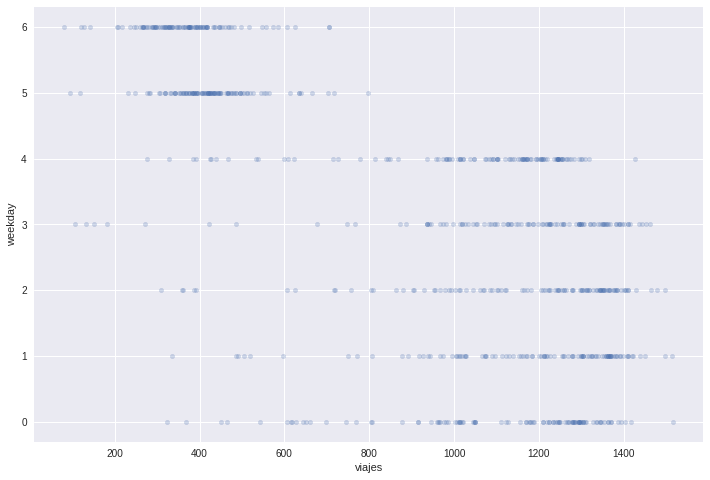

In [207]:
Turi.plot.scatter('viajes','weekday',alpha=0.25,figsize=(12,8));

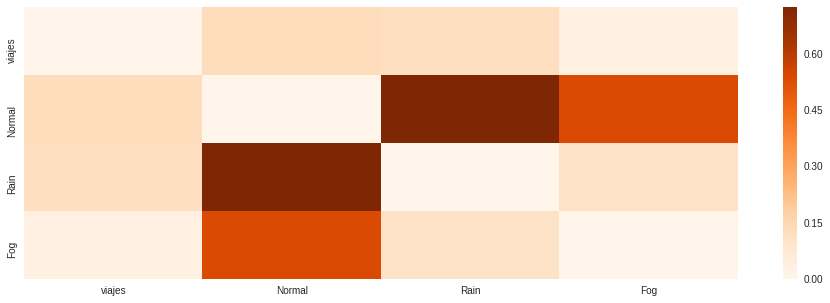

In [213]:
fig, ax = plt.subplots(figsize=(16,5));        # Sample figsize in inches
cor = Turi.loc[:,['viajes','Normal','Rain','Fog']]\
        .corr().abs()
cor.values[[np.arange(4)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

#MALISIMO EL GRAFICO